# Q1

<div dir='rtl'>
    ابتدا تصویر را می‌خوانیم.
</div>

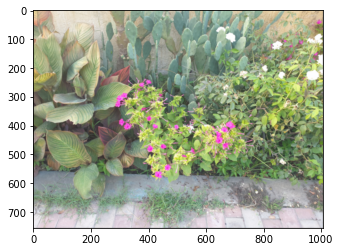

In [104]:
# import libraries and read image
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('flowers.blur.png') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

## الف

True

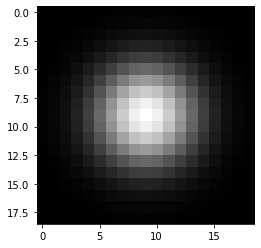

In [105]:
# gaussian filter
f = img
sigma = 3
shape = 2 * 3 * sigma + 1
gauss_filter_x = np.array([np.exp(-(i - shape//2)**2 / (2 * sigma**2)) for i in range(shape)])
gauss_filter_x = gauss_filter_x /  sum(gauss_filter_x)
gauss_filter_x = gauss_filter_x.reshape((1, shape))
gauss_filter = np.dot(gauss_filter_x.transpose(), gauss_filter_x)
save = np.array(gauss_filter / np.max(gauss_filter) * 255, dtype=np.uint8)
plt.imshow(save, cmap='gray');
cv2.imwrite("res01.jpg", save)

<div dir='rtl'>
    مطابق اسلاید فیلتر گاوسی را به دو فیلتر افقی و عمودی تقسیم می‌کنیم. برای به دست آوردن مقادیر فیلتر هم از تعریف تابع گاوس استفاده می‌کنیم.
    این دو فیلتر را در هم ضرب می‌کنیم تا فیلتر گاوسی مد نظر به دست بیاید. سپس آن را با استفاده از 
    plt.imshow()
    به صورت سیاه سفید نمایش می‌دهیم.
    توجه کنید که مقادیر فیلتر اعشاری و کوچیکتر از یک هستند. بنابراین باید این مقادیر را به بازه ۰ تا ۱ اسکیل کرده و در ۲۵۵ ضرب کنیم، سپس آن را به مقدار صحیح تبدیل و آن را ذخیره کنیم.
    مقدار سیگما هم معادل با ۳ در نظر گرفتیم.
</div>

True

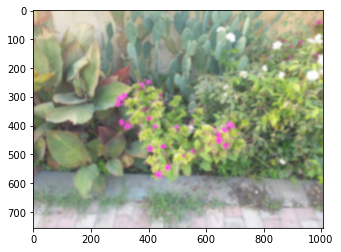

In [106]:
# blurred image
blurred_img = cv2.filter2D(img, -1, gauss_filter)
plt.imshow(blurred_img);
save = cv2.cvtColor(blurred_img, cv2.COLOR_RGB2BGR)
cv2.imwrite("res02.jpg", save)

<div dir='rtl'>
    با استفاده از تابع
    cv2.filter2D()
    فیلتر گاوسی را روی تصویر اعمال کرده و سپس آن را ذخیره می‌کنیم.

True

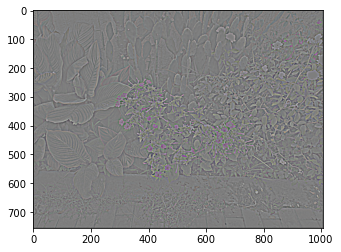

In [107]:
# unsharped mask
unsharped_mask = np.zeros(img.shape, dtype=np.float64)
unsharped_mask += img
unsharped_mask -= blurred_img
save = unsharped_mask - np.min(unsharped_mask)
save = save / np.max(save) * 255
save = np.array(save, dtype=np.uint8)
plt.imshow(save);
save = cv2.cvtColor(save, cv2.COLOR_RGB2BGR)
cv2.imwrite("res03.jpg", save)

<div dir='rtl'>
    مطابق فرمول تصویر آنشارپ را به دست می‌آوریم. این آرایه می‌تواند مقدار منفی داشته باشد، بنابراین آن را به بازه ۰ تا ۲۵۵ اسکیل می‌کنیم و سپس ذخیره می‌کنیم.
</div>

True

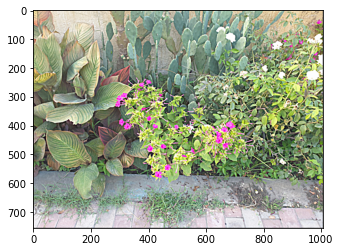

In [108]:
# sharped image
alpha = 1.5
sharped_img = np.zeros(img.shape, dtype=np.float64)
sharped_img += img
sharped_img += alpha * unsharped_mask
sharped_img = np.where(sharped_img > 255.0, 255.0, sharped_img)
sharped_img = np.where(sharped_img < 0.0, 0.0, sharped_img)
sharped_img = np.array(sharped_img, dtype=np.uint8)
plt.imshow(sharped_img);
save = cv2.cvtColor(sharped_img, cv2.COLOR_RGB2BGR)
cv2.imwrite("res04.jpg", save)

<div dir='rtl'>
    با استفاده از فرمول تصویر شارپ شده را به دست می‌آوریم. سپس مقادیر بیشتر از ۲۵۵ را معادل با ۲۵۵ و مقادیر کمتر از ۰ را معادل با ۰ در نظر می‌گیریم و تصویر را ذخیره می‌کنیم. در غیر این صورت مقادیر اورفلو می‌کنند و تصویر حاصل مطلوب ما نخواهد بود.
    همچنین مقدار
    $\alpha$
    را معادل با 
    ۱.۵
    در نظر می‌گیریم.
</div>

## ب

True

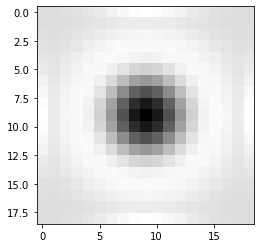

In [109]:
# lapcian of gaussian filter
laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_gauss = cv2.filter2D(gauss_filter, -1, laplacian)
save = laplacian_gauss - np.min(laplacian_gauss)
save = save / np.max(save) * 255
save = np.array(save, dtype=np.uint8)
plt.imshow(save, cmap='gray');
cv2.imwrite("res05.jpg", save)

<div dir='rtl'>
    برای به دست آوردن لاپلاسین گاوس فیلتر لاپلاسین را در فیلتر گاوس
    convolve
    می‌کنیم. سپس این فیلتر را به ۰ تا ۲۵۵ اسکیل کرده، آن را نمایش داده و ذخیره می‌کنیم.
    مقادیر انحراف معیار چون از تابع گاوس قسمت اول استفاده کردم مشابه قسمت الف معادل با ۳ است.
</div>

True

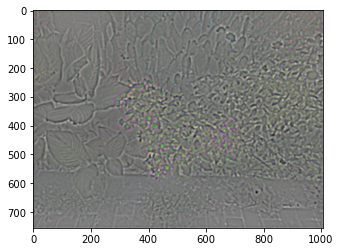

In [110]:
# unsharped mask
unsharped_mask = np.array(img, dtype=np.float64)
unsharped_mask = cv2.filter2D(unsharped_mask, -1, laplacian_gauss)
save = unsharped_mask - np.min(unsharped_mask)
save = save / np.max(save) * 255
save = np.array(save, dtype=np.uint8)
plt.imshow(save);
save = cv2.cvtColor(save, cv2.COLOR_RGB2BGR)
cv2.imwrite("res06.jpg", save)

<div dir='rtl'>
    برای به دست آوردن ماسک آنشارپ فیلتر لاپلاسین گاوس را در تصویر
    convolve
    می‌کنیم. سپس این فیلتر را به ۰ تا ۲۵۵ اسکیل کرده، آن را نمایش داده و ذخیره می‌کنیم.
</div>

True

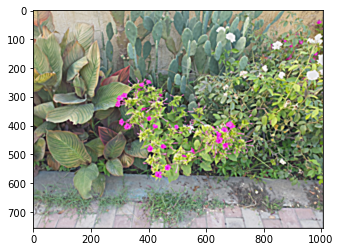

In [111]:
# sharped image
k = 10
sharped_img = np.zeros(img.shape, dtype=np.float64)
sharped_img += img
sharped_img -= k * unsharped_mask
sharped_img = np.where(sharped_img > 255.0, 255.0, sharped_img)
sharped_img = np.where(sharped_img < 0.0, 0.0, sharped_img)
sharped_img = np.array(sharped_img, dtype=np.uint8)
plt.imshow(sharped_img);
save = cv2.cvtColor(sharped_img, cv2.COLOR_RGB2BGR)
cv2.imwrite("res07.jpg", save)

<div dir='rtl'>
    با استفاده از فرمول تصویر شارپ شده را به دست می‌آوریم. سپس مقادیر بیشتر از ۲۵۵ را معادل با ۲۵۵ و مقادیر کمتر از ۰ را معادل با ۰ در نظر می‌گیریم و تصویر را ذخیره می‌کنیم. در غیر این صورت مقادیر اورفلو می‌کنند و تصویر حاصل مطلوب ما نخواهد بود.
    همچنین مقدار
    $k$
    را معادل با 
    ۱۰
    در نظر می‌گیریم.
</div>

## ج

True

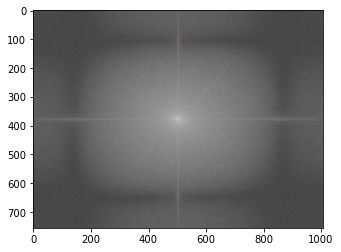

In [112]:
# log magnitude of image
def get_magnitude(img):
    fft = np.fft.fft2(img)
    shifted_fft = np.fft.fftshift(fft)
    magnitude = np.abs(shifted_fft)
    return magnitude
r, g, b = cv2.split(img)
rm, gm, bm = get_magnitude(r), get_magnitude(g), get_magnitude(b)
magnitude = cv2.merge((rm, gm, bm))
magnitude = np.log(magnitude)
save = magnitude - np.min(magnitude)
save = save / np.max(magnitude) * 255
save = np.array(save, dtype=np.uint8)
plt.imshow(save);
save = cv2.cvtColor(save, cv2.COLOR_RGB2BGR)
cv2.imwrite("res08.jpg", save)

<div dir='rtl'>
    با استفاده از توابع آماده ابتدا فوریه هر سه کانال تصویر را به طور جدا حساب کرده، سپس آن‌ها را شیفت می‌دهیم تا مرکز آن‌ها به صفر منتقل شود، پس از آن
    magnitude
    و لگاریتم آن‌ها را محاسبه می‌کنیم.
    این سه تصویر را ادغام می‌کنیم و به بازه ۰ تا ۲۵۵ اسکیل می‌کنیم تا تصویر مد نظر ما به دست آید و آن را ذخیره می‌کنیم.
    (به نظر می‌رسد که در صورت سوال به اشتباه نوشته شده است که 
    magnitude
    نمایش داده شود و بهتر است که 
    لگاریتم آن نمایش داده شود.
</div>

True

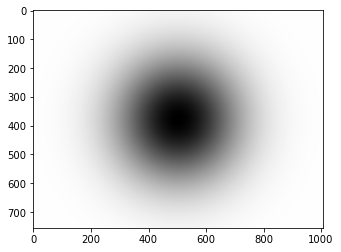

In [113]:
# gaussian high pass filter
D_0 = 150
gaussian_high_pass_filter = 1 - np.array([[np.exp(-((u - magnitude.shape[1]//2)**2 + (v - magnitude.shape[0]//2)**2) / (2 * D_0**2)) for u in range(magnitude.shape[1])] for v in range(magnitude.shape[0])])
save = np.array(gaussian_high_pass_filter / np.max(gaussian_high_pass_filter) * 255, dtype=np.uint8)
plt.imshow(save, cmap='gray');
cv2.imwrite("res09.jpg", save)

<div dir='rtl'>
    مطابق فرمول اسلاید 
    ۶۴
    یک 
    high pass filter
    گاوسی می‌سازیم و از آن استفاده می‌کنیم.
    سپس آن را به بازه ۰ تا ۲۵۵ اسکیل کرده و نمایش می‌دهیم.
    مقدار 
    $D_0$
    برای این فیلتر برابر با ۱۵۰ در نظر گرفته شده است.
</div>

True

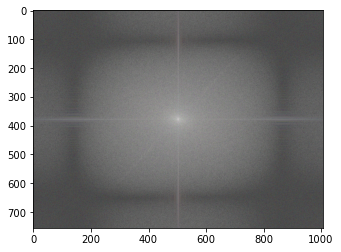

In [114]:
# sharped image in fourier
def get_shifted_fft(img):
    fft = np.fft.fft2(img)
    shifted_fft = np.fft.fftshift(fft)
    return shifted_fft

k = 1
r, g, b = cv2.split(img)
rm, gm, bm = get_shifted_fft(r), get_shifted_fft(g), get_shifted_fft(b)
_filter = 1 + k * gaussian_high_pass_filter
rmf, gmf, bmf = rm * _filter, gm * _filter, bm * _filter
filtered_magnitude = cv2.merge((np.abs(rmf), np.abs(gmf), np.abs(bmf)))
log_filtered_magnitude = np.log(filtered_magnitude)
save = log_filtered_magnitude - np.min(log_filtered_magnitude)
save = save / np.max(save) * 255
save = np.array(save, dtype=np.uint8)
plt.imshow(save);
save = cv2.cvtColor(save, cv2.COLOR_RGB2BGR)
cv2.imwrite("res10.jpg", save)

<div dir='rtl'>
    مطابق فرمول فیلتر 
    high pass
    را روی 
    shifted fft
    هر سه کانال اعمال می‌کنیم و پس از آن لگاریتم
    magnitude
    آن‌ها را با هم مرج کرده و نمایش می‌دهیم.
    همچنین توجه کنید که لازم است فیلتر روی 
    shifted fft
    اعمال شود در غیر این صورت غلط است.
    همچنین مقدار
    k
    را معادل با یک در نظر گرفتیم.
</div>

True

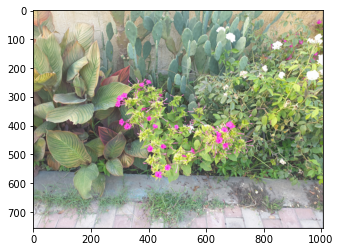

In [115]:
# sharped image
rf, gf, bf = np.fft.ifftshift(rmf), np.fft.ifftshift(gmf), np.fft.ifftshift(bmf)
r, g, b = np.real(np.fft.ifft2(rf)), np.real(np.fft.ifft2(gf)), np.real(np.fft.ifft2(bf))
sharped_img = cv2.merge((r, g, b))
sharped_img = np.where(sharped_img > 255.0, 255.0, sharped_img)
sharped_img = np.where(sharped_img < 0.0, 0.0, sharped_img)
sharped_img = np.array(sharped_img, dtype=np.uint8)
plt.imshow(sharped_img);
save = cv2.cvtColor(sharped_img, cv2.COLOR_RGB2BGR)
cv2.imwrite("res11.jpg", save)

<div dir='rtl'>
    کانال‌های فیلتر شده در قسمت قبل را شیفت می‌دهیم و 
    inverse fourier transform
    می‌زنیم و
    مقدار
    real
    آن‌ها را برای نمایش تصویر شارپ شده انتخاب می‌کنیم.
    مقادیر بزرگتر از ۲۵۵ را ۲۵۵ و مقادیر کوچکتر از ۰ را معادل با صفر قرار می‌دهیم و تصویر مد نظر ما حاصل شده است.
</div>

## د

True

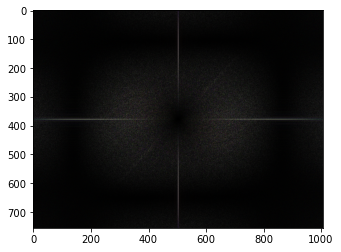

In [116]:
# laplacian of gauss
laplacian_gauss = np.array([[4 * (np.pi ** 2) * ((u - magnitude.shape[1]//2)**2 + (v - magnitude.shape[0]//2)**2) for u in range(magnitude.shape[1])] for v in range(magnitude.shape[0])])
rmf, gmf, bmf = rm * laplacian_gauss, gm * laplacian_gauss, bm * laplacian_gauss
save = cv2.merge((np.abs(rmf), np.abs(gmf), np.abs(bmf)))
save = save - np.min(save)
save = save / np.max(save) * 255
save = np.array(save, dtype=np.uint8)
plt.imshow(save);
save = cv2.cvtColor(save, cv2.COLOR_RGB2BGR)
cv2.imwrite("res12.jpg", save)

<div dir='rtl'>
    مطابق فرمول ابتدا مقدار فوریه لاپلاسین گاوس را به دست می‌آوریم و در مقدار شیفت خورده فوریه هر کانال ضرب می‌کنیم. سپس 
    magnitude
    آن‌ها را به دست آورده و مرج می‌کنیم. پس از آن به بازه ۰ تا ۲۵۵ اسکیل کرده، نمایش داده و ذخیره می‌کنیم.
    توجه کنید که در این قسمت بر خلاف قسمت‌های قبلی مقدار لگاریتم محاسبه نشده است چون مقادیر صفر در آرایه فوریه لاپلاسین گاوس وجود دارد و دلیل تفاوت این شکل با شکل‌های قبلی همین است.
</div>

True

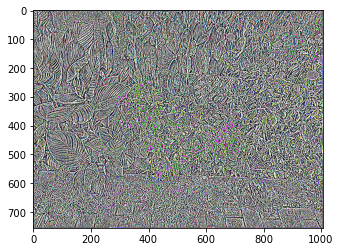

In [117]:
# unsharped mask
rf, gf, bf = np.fft.ifftshift(rmf), np.fft.ifftshift(gmf), np.fft.ifftshift(bmf)
r, g, b = np.real(np.fft.ifft2(rf)), np.real(np.fft.ifft2(gf)), np.real(np.fft.ifft2(bf))
unsharped_mask = cv2.merge((r, g, b))
unsharped_mask = np.where(unsharped_mask > 255.0, 255.0, unsharped_mask)
unsharped_mask = np.where(unsharped_mask < 0.0, 0.0, unsharped_mask)
save = unsharped_mask - np.min(unsharped_mask)
save = np.array(save / np.max(save) * 255, dtype=np.uint8)
plt.imshow(save);
save = cv2.cvtColor(save, cv2.COLOR_RGB2BGR)
cv2.imwrite("res13.jpg", save)

<div dir='rtl'>
    مقادیر به دست آمده در قسمت قبل را شیفت داده و مقدار
    inverse fourier transform
    می‌گیریم. سپس مقدار
    real
    آن‌ها را به بازه ۰ تا ۲۵۵ اسکیل می‌کنیم و به این ترتیب
    unshap mask
    ما حاصل شده است.
</div>

True

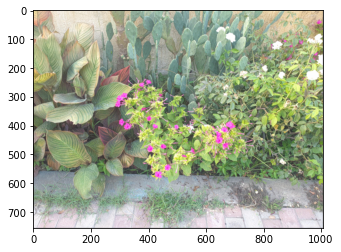

In [118]:
# sharped image
k = 0.05
sharped_img = np.zeros(img.shape, dtype=np.float64)
sharped_img += img
sharped_img += k * unsharped_mask
sharped_img = np.where(sharped_img > 255.0, 255.0, sharped_img)
sharped_img = np.where(sharped_img < 0.0, 0.0, sharped_img)
sharped_img = np.array(sharped_img, dtype=np.uint8)
plt.imshow(sharped_img);
save = cv2.cvtColor(sharped_img, cv2.COLOR_RGB2BGR)
cv2.imwrite("res14.jpg", save)

<div dir='rtl'>
    مقدار 
    unsharped mask
    در قسمت قبل را
    k
    برابر می‌کنیم و با تصویر اصلی جمع می‌کنیم. مقادیر بزرگتر از ۲۵۵ را معادل با ۲۵۵ و مقادیر کوچکتر از ۰ را معادل با صفر در نظر می‌گیریم.
    مقدار 
    k
    در این قسمت را باید معادل با ۰.۰۵ در نظر بگیریم.
</div>

|مقدار پارامتر|نام پارامتر|
| ----------- | ----------- |
|۳|$\sigma$ در قسمت الف|
|۱.۵|$\alpha$ در قسمت الف|
|۳|$\sigma$ در قسمت ب|
|۱۰|$k$ در قسمت ب|
|۱۵۰|$D_0$ در قسمت ج|
|۱|$k$ در قسمت ج|
|۰.۰۵|$k$ در قسمت د|

# Q2

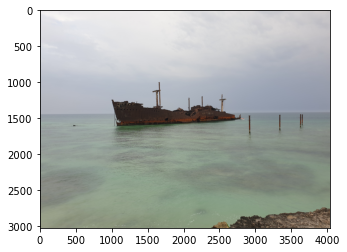

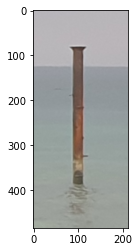

In [32]:
# import libraries and read image
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Greek-ship.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);
plt.show()

template = cv2.imread('patch.png') 
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
plt.imshow(template);

<div dir='rtl'>
    دو تصویر مد نظر سوال را می‌خوانیم.
    مطابق اسلاید می‌دانیم
    normalized cross correlation
    بهترین نتیجه را می‌دهد. بنابراین از این روش استفاده می‌کنیم.
    برای سادگی تصویر را سیاه و سفید می‌کنیم و 
    template matching
    را روی آن اعمال می‌کنیم.
</div>

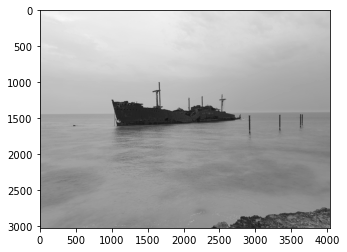

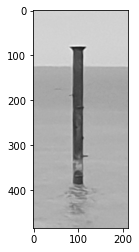

In [33]:
# make black and white images
colored_img = img
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray');
plt.show()
colored_template = template
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
plt.imshow(template, cmap='gray');
plt.show()

<div dir='rtl'>
    با استفاده از تابع آماده
    cv2.cvtColor()
    تصاویر مورد نظر را سیاه سفید کردیم.
</div>

In [34]:
# preprocess image
def preprocess(image):
    image = cv2.GaussianBlur(image, (11, 11), 0)
    _filter = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    image = cv2.filter2D(image, -1, _filter)
    return image

img, template = preprocess(img), preprocess(template)

<div dir='rtl'>
    برای پیش پردازش از فیلتر گاوسی
    استفاده می‌کنیم تا نویز‌ها را حذف کنیم. همچنین از گرادیان نیز در راستای 
    x
    استفاده می‌کنیم که در پیدا کردن چوب به ما کمک کند.
    در عمل نتیجه را بهتر کرد.
    همچنین گرادیان در راستای
    y
    نیز تست شد اما خوب عمل نکرد.
</div>

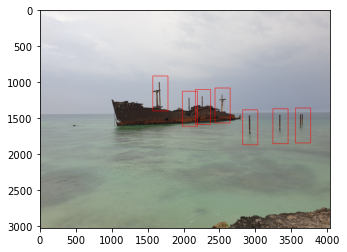

True

In [35]:
np.warnings.filterwarnings('ignore')

# calculate normalized cross correlation for a given template and index of image
def normalized_cross_correlation(template, image, m, n, diff_template, ssdt):
    k, l = template.shape[0], template.shape[1]
    patch_img = image[m:m+k, n:n+l]
    diff_patch_img = patch_img - np.mean(patch_img)
    ssdp = np.sqrt(np.sum(diff_patch_img ** 2)) # sum of squared diff_patch_img
    return np.sum(diff_template * diff_patch_img) / (ssdp * ssdt)

# calculate full ncc for whole image
def full_NCC(image, template, range1, range2):
    # calculating parameters
    image = np.array(image, dtype=np.float64)
    template = np.array(template, dtype=np.float64)
    diff_template = template - np.mean(template) # subtract mean from template is diff_template
    ssdt = np.sqrt(np.sum(diff_template**2)) # sqrt of sum of squared diff_template

    # calculate ncc matrix
    ncc_arr = np.zeros(image.shape, dtype=np.float64)
    for i in range(range1[0], range1[1]):
        for j in range(range2[0], range2[1]):
            ncc_arr[i][j] = normalized_cross_correlation(template, image, i, j, diff_template, ssdt)
    return ncc_arr

# make a pyramid of the image
def pyramid(image, template, depth=5):
    x, y = 0, 0
    for i in range(depth, -1, -1):
        scale = (1/2)**i
        dim = (int(image.shape[1] * scale), int(image.shape[0] * scale))
        resized_img = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
        dim = (int(template.shape[1] * scale), int(template.shape[0] * scale))
        resized_tmp = cv2.resize(template, dim, interpolation=cv2.INTER_AREA)
        range1 = (x-1, x+1+1)
        range2 = (y-1, y+1+1)
        if i == depth:
            range1 = (0, resized_img.shape[0] - resized_tmp.shape[0])
            range2 = (0, resized_img.shape[1] - resized_tmp.shape[1])
        ncc_arr = full_NCC(resized_img, resized_tmp, range1, range2)
        max_idx = np.unravel_index(np.nanargmax(ncc_arr), ncc_arr.shape)
        x, y = max_idx[0] * 2, max_idx[1] * 2
    return max_idx

# find match
times = 0
while times < 7:
    idx = pyramid(img, template)
    shape = template.shape
    img[int(idx[0]):int(idx[0] + shape[0]), int(idx[1]):int(idx[1] + shape[1])] = 0
    colored_img = cv2.rectangle(colored_img, (idx[1], idx[0]), (idx[1] + template.shape[1], idx[0] + template.shape[0]), color=(255, 0, 0), thickness=5)
    times += 1
plt.imshow(colored_img)
plt.show()
save = cv2.cvtColor(colored_img, cv2.COLOR_RGB2BGR)
cv2.imwrite("res15.jpg", save)

<div dir='rtl'>
    به این صورت عمل می‌کنیم که از
    normalized cross correlation
    استفاده می‌کنیم. چون مطابق اسلاید بهترین نتیجه را می‌دهد.
    برای پیدا کردن هر 
    patch
    یک هرم می‌زنیم و 
    ncc matrix
    را می‌سازیم و مقدار ماکسیمم را که پیدا کردیم جای آن
    patch
    روی تصویر را پیدا کردیم. سپس آن 
    patch
    را از تصویر حذف می‌کنیم تا در مرحله بعدی دوباره آن را پیدا نکنیم و این کار را آن قدر ادامه می‌دهیم که دیگر تمام پچ‌ها را پیدا کرده باشیم.
</div>

# Q3

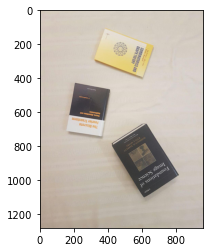

In [748]:
# import libraries and read image
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('books.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

<div dir='rtl'>
    ابتدا تصویر را می‌خوانیم.
</div>

In [749]:
# calculating coordinates of transformed patch image
def get_transformed_coordinates(coordinates):
    h = np.sqrt(np.sum((coordinates[1] - coordinates[0])**2))
    w = np.sqrt(np.sum((coordinates[2] - coordinates[0])**2))
    return np.array([[0, 0], [h, 0], [0, w], [h, w]])

yellow_coordinates = np.array([[210, 665], [105, 383], [394, 601], [288, 318]])
white_coordinates = np.array([[739, 356], [465, 403], [708, 153], [427, 204]])
black_coordinates = np.array([[969, 811], [668, 622], [1099, 610], [796, 421]])
books_coordinates = [yellow_coordinates, white_coordinates, black_coordinates]

<div dir='rtl'>
    نقاط گوشه را با استفاده از paint3D به دست آوردیم و تابعی زدیم که نقاط گوشه ماتریس نهایی هر تصویر
    را مطابق با گوشه‌های ورودی داده شده به دست می‌آورد.
</div>

In [750]:
# calculating transformation matrices
transforms = []
i = 0
for coordinates in books_coordinates:
    h, status = cv2.findHomography(coordinates, get_transformed_coordinates(coordinates))
    transforms.append(h)
    i += 1
    print("book number " + str(i) + " transformation matrix:\n", h)

book number 1 transformation matrix:
 [[-3.29653723e-01 -9.47754453e-01  6.99483993e+02]
 [ 9.47218234e-01 -3.52687640e-01  3.56214517e+01]
 [ 2.38540281e-05  1.84904139e-06  1.00000000e+00]]
book number 2 transformation matrix:
 [[-9.45765650e-01  1.44427267e-01  6.47504708e+02]
 [-1.68389121e-01 -9.81672749e-01  4.73915059e+02]
 [ 2.32028695e-05 -1.34542083e-04  1.00000000e+00]]
book number 3 transformation matrix:
 [[-8.46373194e-01 -5.47405548e-01  1.26408152e+03]
 [ 5.40941965e-01 -8.61500166e-01  1.74503871e+02]
 [ 2.12537437e-05 -1.01602576e-05  1.00000000e+00]]


<div dir='rtl'>
    با استفاده از تابع آماده
    cv2.findHomography()
    ماتریس‌های نگاشت برای هر کتاب را به دست می‌آوریم. همچنین ماتریس نگاشت برای هر کتاب چاپ شده است. اولین ماتریس برای کتاب زرد رنگ، دومی برای کتاب سفید مشکی و آخری برای کتاب مشکی است.
</div>

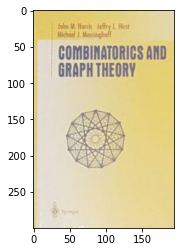

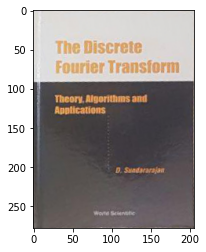

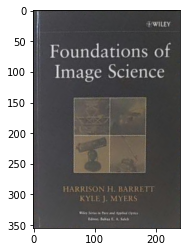

In [752]:
# bilinear warping
def warp(src, des_shape, inv_t):
    des = np.zeros(des_shape)
    for i in range(des_shape[0]):
        for j in range(des_shape[1]):
            xp_yp = np.array([[i], [j], [1]], dtype=np.float32)
            x_y = np.dot(inv_t, xp_yp)
            x_y /= x_y[2]
            x, y = x_y[0][0], x_y[1][0]
            a = x - int(x)
            b = y - int(y)
            ma, mb = int(x), int(y)
            intensity = (1 - a) * (1 - b) * src[ma][mb]
            intensity += a * (1 - b) * src[ma + 1][mb]
            intensity += (1 - a) * b * src[ma][mb + 1]
            intensity += a * b * src[ma + 1][mb + 1]
            des[i][j] = intensity
    des = np.array(des, dtype=np.uint8)
    return des
    

r, g, b = cv2.split(img)
for i in range(3):
    inv_transform = np.linalg.inv(transforms[i])
    shape = np.array(get_transformed_coordinates(books_coordinates[i])[-1], dtype=np.int)
    des_r = warp(r, shape, inv_transform)
    des_g = warp(g, shape, inv_transform)
    des_b = warp(b, shape, inv_transform)
    des = cv2.merge((des_r, des_g, des_b))
    plt.imshow(des);
    plt.show()
    save = cv2.cvtColor(des, cv2.COLOR_RGB2BGR)
    cv2.imwrite("res" + str(16 + i) + ".jpg", save)

<div dir='rtl'>
    ماتریس‌های نگاشت را که به دست آوردیم، وارون این ماتریس‌ها را به دست می‌آوریم. برای هر خانه ماتریس مقصد باید مقدار پیکسل متناظر با آن در تصویر مبدأ را بیابیم. این کار را برای هر کانال به طور جداگانه انجام می‌دهیم. برای این کار در تابع 
    warp
    مطابق فرمول اسلاید ۳۶ جلسه نهم عمل می‌کنیم. 
    $x$
    و
    $y$
    به دست آمده از ضرب ماتریس وارون نگاشت در 
    $x'$
    و
    $y'$
    یک مقدار اعشاری است و با توجه به نسبت مساحت‌ها مقدار 
    intensity
    آن تعیین می‌شود (همان تعریف درونیابی به صورت
    bilinear
    مد نظر است).
    همچنین چون خانه آخر 
    x_y
    ممکن است برابر با یک نباشد، لازم است نرمالایز صورت بگیرد.
</div>

## Q4

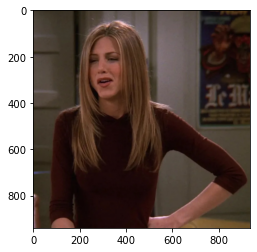

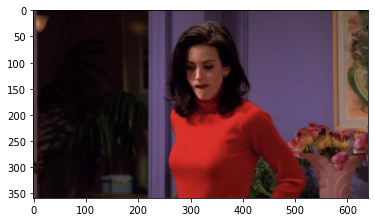

In [18]:
# import libraries and read image
import numpy as np
import cv2
import matplotlib.pyplot as plt

near = cv2.imread('res19-near.jpg') 
near = cv2.cvtColor(near, cv2.COLOR_BGR2RGB)
plt.imshow(near);
plt.show()

far = cv2.imread('res20-far.jpg') 
far = cv2.cvtColor(far, cv2.COLOR_BGR2RGB)
plt.imshow(far);

<div dir='rtl'>
    دو تصویر بالا تصاویر مورد نظر ما هستند. حال باید این دو را بر روی یک دیگر منطبق کنیم.
</div>

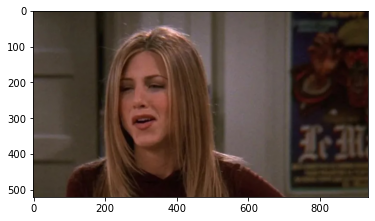

True

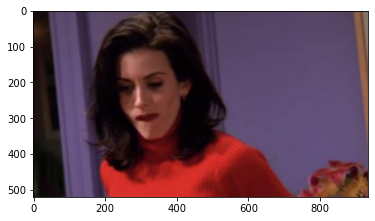

In [19]:
# calculate euclidean distance
def get_euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

# calculate transforms needed in order to align far image to near image
def transform(near, far):
    # translate to origin
    t = -far[0]
    t1 = np.array([[1, 0, t[1]], [0, 1, t[0]], [0, 0, 1]])
    
    # rotate
    d_near = near[1] - near[0]
    d_far = far[1] - far[0]
    theta = np.arctan((d_near[0]) / (d_near[1])) - np.arctan((d_far[0]) / (d_far[1]))
    t2 = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])
    
    # scale
    dist_near = get_euclidean_distance(near[0], near[1])
    dist_far = get_euclidean_distance(far[0], far[1])
    a = dist_near / dist_far
    t3 = np.array([[a, 0, 0], [0, a, 0], [0, 0, 1]])
    
    # translate to near
    t = near[0]
    t4 = np.array([[1, 0, t[1]], [0, 1, t[0]], [0, 0, 1]])
    
    t = np.dot(np.dot(t4, t3), np.dot(t2, t1))
    return t
     
# warp
def warp(near, far, near_eyes, far_eyes):
    t = transform(near_eyes, far_eyes)
    far_shape_t = np.array(np.dot(t, np.array([[far.shape[0]], [far.shape[1]], [1]])), dtype=np.int)
    far_t = cv2.warpPerspective(far, t, (min(near.shape[1], far_shape_t[1][0]), min(near.shape[0], far_shape_t[0][0])))
    near_t = near[:min(near.shape[0], far_shape_t[0][0]), :min(near.shape[1], far_shape_t[1][0])]
    return far_t, near_t


far_eyes = np.array([[108, 302], [109, 334]])
near_eyes = np.array([[213, 261], [208, 338]])
far_t, near_t = warp(near, far, near_eyes, far_eyes)

plt.imshow(near_t);
plt.show()
save = cv2.cvtColor(near_t, cv2.COLOR_RGB2BGR)
cv2.imwrite("res21-near.jpg", save)

plt.imshow(far_t);
save = cv2.cvtColor(far_t, cv2.COLOR_RGB2BGR)
cv2.imwrite("res22-far.jpg", save)

<div dir='rtl'>
    تصویر دور را می‌خواهیم بر روی تصویر نزدیک منطبق کنیم. برای این کار از تابع
    transform
    استفاده می‌کنیم که در آن چهار
    transform
    شامل
    translate
    و
    rotate
    و
    scale
    استفاده شده است تا دو تصویر بر هم منطبق شوند. همچنین از تابع 
    cv2.warpPerspective()
    برای وارپ کردن این ترنسفورم‌ها استفاده شده است.
</div>

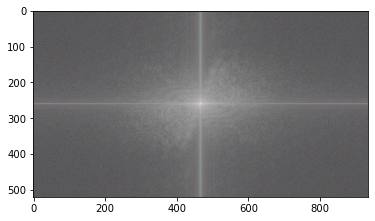

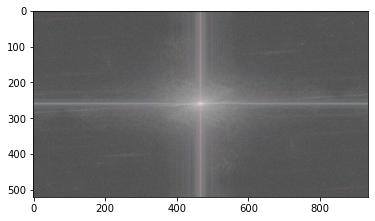

In [20]:
# no comments needed!
def show_log_fft_one_channel(img):
    fft = np.fft.fft2(img)
    shift = np.fft.fftshift(fft)
    return shift, np.log(np.abs(shift))

def show_log_fft_three_channel(img, name):
    r, g, b = cv2.split(img)
    shift_r, r = show_log_fft_one_channel(r)
    shift_g, g = show_log_fft_one_channel(g)
    shift_b, b = show_log_fft_one_channel(b)
    log_fft = cv2.merge((r, g, b))
    show = log_fft - np.min(log_fft)
    show = np.array(show / np.max(show) * 255, dtype=np.uint8)
    plt.imshow(show);
    plt.show()
    save = cv2.cvtColor(show, cv2.COLOR_RGB2BGR)
    cv2.imwrite(name, save)
    return shift_r, shift_g, shift_b

near_fft = show_log_fft_three_channel(near_t, 'res23-dft-near.jpg')
far_fft = show_log_fft_three_channel(far_t, 'res24-dft-far.jpg')

<div dir='rtl'>
    برای هر تصویر، سه کانال را جدا کرده و با استفاده از توابع 
    np.fft.fft2()
    و
    np.fft.fftshift()
    مقدار فوریه شیفت داده شده را برای هر کانال به دست اورده، سپس آن‌ها را مرج کرده به بازه ۰ تا ۲۵۵ می‌بریم تا فرکانس را نمایش دهیم.
</div>

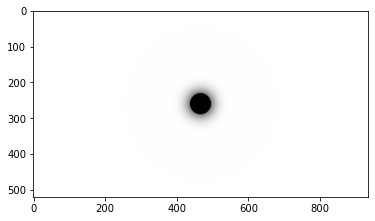

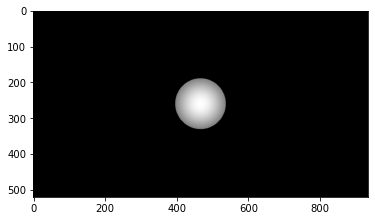

In [21]:
# create gaussian low pass and high pass filters r=25, s=60
def get_filter(sigma, is_high, shape):
    D_0 = sigma
    gaussian_low_pass_filter = np.array([[np.exp(-((u - shape[1]//2)**2 + (v - shape[0]//2)**2) / (2 * D_0**2)) for u in range(shape[1])] for v in range(shape[0])])
    gaussian_high_pass_filter = 1 - gaussian_low_pass_filter
    if is_high:
        _filter = gaussian_high_pass_filter
    else:
        _filter = gaussian_low_pass_filter
    _filter = np.where(_filter < 0.5, 0, _filter)
    save = _filter - np.min(_filter)
    save = np.array(save / np.max(save) * 255, dtype=np.uint8)
    plt.imshow(save, cmap='gray');
    plt.show()
    if is_high:
        cv2.imwrite('res25-highpass-' + str(sigma) + '.jpg' , save)
    else:
        cv2.imwrite('res26-lowpass-' + str(sigma) + '.jpg' , save)
    return _filter

high_pass = get_filter(25, True, near_t.shape)
low_pass = get_filter(60, False, far_t.shape)

<div dir='rtl'>
    مشابه سوال اول دو فیلتر
    high pass
    و
    low pass
    را به دست می‌آوریم.
    مقدار
    $r = 25$
    و
    $s = 60$
    می‌باشد.
    همچنین مطابق مقاله باید یک
    cut-off
    در نظر بگیریم و مقادیر کوچکتر
    ۰.۵
    را معادل با صفر در نظر بگیریم.
</div>

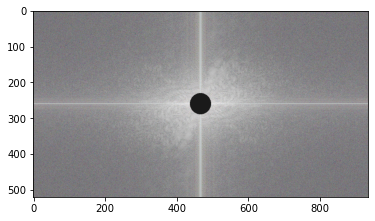

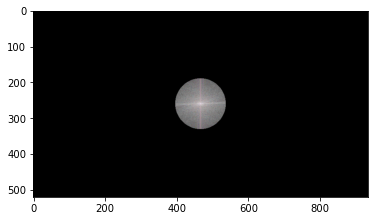

In [22]:
# filtering transformed images
def filter_image(img, f, name):
    np.warnings.filterwarnings('ignore')
    r, g, b = img
    rt, gt, bt = r*f, g*f, b*f
    rts, gts, bts = np.abs(rt), np.abs(gt), np.abs(bt)
    rts = np.where(rts == 0, 0, np.log(rts))
    gts = np.where(gts == 0, 0, np.log(gts))
    bts = np.where(bts == 0, 0, np.log(bts))
    filtered_fft = cv2.merge((rts, gts, bts))
    save = filtered_fft - np.min(filtered_fft)
    save = np.array(save / np.max(save) * 255, dtype=np.uint8)
    plt.imshow(save)
    plt.show();
    save = cv2.cvtColor(save, cv2.COLOR_RGB2BGR)
    cv2.imwrite(name, save)
    return rt, gt, bt
    
near_high_passed = filter_image(near_fft, high_pass, 'res27-highpassed.jpg')
far_low_passed = filter_image(far_fft, low_pass, 'res28-lowpassed.jpg')

<div dir='rtl'>
    فیلترها را با ضرب کردن روی مقادیر فوریه، بر روی تصاویر اعمال می‌کنیم. سپس به بازه ۰ تا ۲۵۵ اسکیل می‌کنیم تا بتوانیم آن‌ها را نمایش دهیم.
</div>

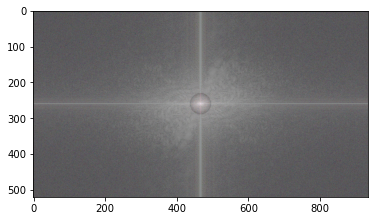

In [23]:
# calculating radius of gaussian filter (nonzero values)
def get_gaussian_radius(image, is_high):
    if is_high:  
        _range = range(image.shape[1] // 2, 0, -1)
    else:
        _range = range(image.shape[1])
    for i in _range:
        if image[image.shape[0] // 2][i] > 0:
            return image.shape[1] // 2 - i

# merge filtered and transformed image using weighted average
def merge_filters(near, far):
    nr, ng, nb = near
    fr, fg, fb = far
    r1 = get_gaussian_radius(nr, True)
    r2 = get_gaussian_radius(fr, True)
    r1, r2 = min(r1, r2), max(r1, r2)
    shape = near[0].shape
    mfr, mfg, mfb = np.zeros(shape, dtype=np.complex), np.zeros(shape, dtype=np.complex), np.zeros(shape, dtype=np.complex)
    for i in range(shape[0]):
        for j in range(shape[1]):
            # no overlap
            if (i - shape[0]//2)**2 + (j - shape[1]//2)**2 > max(r1, r2)**2:
                mfr[i][j] = nr[i][j]
                mfg[i][j] = ng[i][j]
                mfb[i][j] = nb[i][j]
            # overlapping part -> weighted average
            elif (i - shape[0]//2)**2 + (j - shape[1]//2)**2 > min(r1, r2)**2:
                dist = get_euclidean_distance(np.array([i, j]), np.array([shape[0] // 2, shape[1] // 2]))
                mfr[i][j] = (dist - r1) / (r2 - r1) * nr[i][j] + (dist - r2) / (r1 - r2) * fr[i][j]
                mfg[i][j] = (dist - r1) / (r2 - r1) * ng[i][j] + (dist - r2) / (r1 - r2) * fg[i][j]
                mfb[i][j] = (dist - r1) / (r2 - r1) * nb[i][j] + (dist - r2) / (r1 - r2) * fb[i][j]
            # no overlap
            else:
                mfr[i][j] = fr[i][j]
                mfg[i][j] = fg[i][j]
                mfb[i][j] = fb[i][j]
    r, g, b = np.abs(mfr), np.abs(mfg), np.abs(mfb)
    r = np.where(r == 0, 0, np.log(r))
    g = np.where(g == 0, 0, np.log(g))
    b = np.where(b == 0, 0, np.log(b))
    merged_fft = cv2.merge((r, g, b))
    save = merged_fft - np.min(merged_fft)
    save = np.array(save / np.max(save) * 255, dtype=np.uint8)
    plt.imshow(save)
    plt.show();
    save = cv2.cvtColor(save, cv2.COLOR_RGB2BGR)
    cv2.imwrite('res29-hybrid.jpg', save)
    return mfr, mfg, mfb
merged_fft = merge_filters(near_high_passed, far_low_passed)

<div dir='rtl'>
    برای ترکیب کردن دو فیلتر به این شکل عمل می‌کنیم که ابتدا شعاع دایره ناصفر در فرکانس را برای هر یک از فرکانس‌های فیلتر شده به دست می‌آوریم. جاهایی که این دو دایره اشتراک ندارند که یکی از فرکانس‌ها خواهد بود و در غیر این صورت یک میانگین وزن‌دار اعمال می‌کنیم.
    سپس به بازه ۰ تا ۲۵۵ اسکیل می‌کنیم تا نمایش دهیم.
</div>

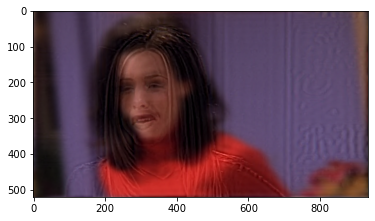

In [24]:
# calculate final image
def get_filtered_image(fft):
    r, g, b = fft
    rt, gt, bt = np.fft.ifftshift(r), np.fft.ifftshift(g), np.fft.ifftshift(b)
    rt, gt, bt = np.fft.ifft2(rt), np.fft.ifft2(gt), np.fft.ifft2(bt)
    rt, gt, bt = np.real(rt), np.real(gt), np.real(bt)
    filtered_img = cv2.merge((rt, gt, bt))
    filtered_img = np.where(filtered_img > 255.0, 255.0, filtered_img)
    filtered_img = np.where(filtered_img < 0.0, 0.0, filtered_img)
    filtered_img = np.array(filtered_img, dtype=np.uint8)
    plt.imshow(filtered_img)
    plt.show();
    save = cv2.cvtColor(filtered_img, cv2.COLOR_RGB2BGR)
    cv2.imwrite('res30-hybrid-near.jpg', save)
    return filtered_img
filtered_image = get_filtered_image(merged_fft)    

<div dir='rtl'>
    تبدیل به بعد مکان مشابه سوال اول صورت می‌گیرد.
</div>

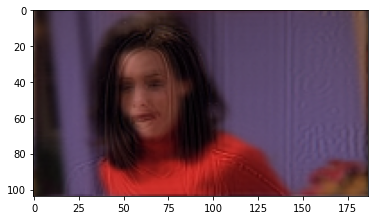

True

In [25]:
# scaled final image
shape = (filtered_image.shape[1] // 5, filtered_image.shape[0] // 5)
save = cv2.resize(filtered_image, shape, interpolation=cv2.INTER_AREA)
plt.imshow(save)
plt.show();
save = cv2.cvtColor(save, cv2.COLOR_RGB2BGR)
cv2.imwrite('res31-hybrid-far.jpg', save)

<div dir='rtl'>
    از
    cv2.resize
    برای ریسایز کردن تصویر استفاده می‌کنیم. همچنین از
    cv2.INTER_AREA
    برای درونیابی استفاده می‌کنیم که تا حد امکان اطلاعات تصویر از دست نرود.
</div>